In [1]:
pip install -U numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install -U Cython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install -U scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [4]:
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import DynamicWeightedMajorityClassifier
import matplotlib.pyplot as plt

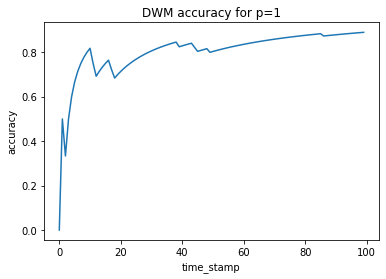

number of wrong predictions are 11


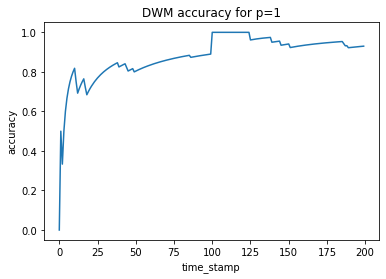

<Figure size 432x288 with 0 Axes>

number of wrong predictions are 7


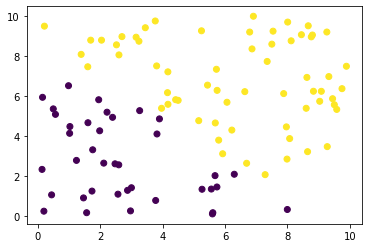

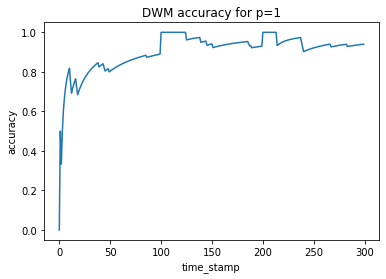

number of wrong predictions are 6


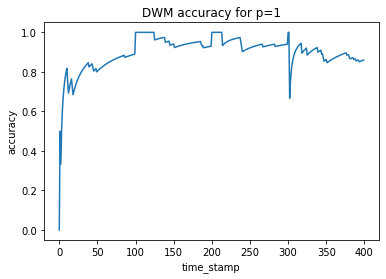

<Figure size 432x288 with 0 Axes>

number of wrong predictions are 14


In [17]:
# Setup Dynamic Weighted Majority Ensemble Classifier
dwm = DynamicWeightedMajorityClassifier(period=1)
#initializing important variables
n_samples=0
max_samples=100
time=0
acc=[]
correct_cnt=0
wrong_pred=0
# Setup a data stream
stream = SEAGenerator(random_state=1,classification_function=0)
# Function 0: if (attr1+attr2<=8) else 1
# Train the classifier with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = dwm.predict(X)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    else:
      wrong_pred+=1
    dwm.partial_fit(X, y)
    n_samples += 1
    time +=1
    acc.append(correct_cnt/n_samples)
# Plotting the accuracy after introducing drift
plt.plot(range(time),acc)
plt.xlabel('time_stamp')
plt.ylabel('accuracy')
plt.title('DWM accuracy for p=1')
plt.show()
print(f"number of wrong predictions are {wrong_pred}")
#changing the classifier function (introducing drift)
stream = SEAGenerator(random_state=1,classification_function=1)
# Function 1: if (attr1+attr2<=9) else 1
n_samples=0
correct_cnt=0
wrong_pred=0
X_0=[]
X_1=[]
Y_0=[]
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    X_0.append(X[0][0])
    X_1.append(X[0][1])
    Y_0.append(y[0])
    y_pred = dwm.predict(X)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    else:
      wrong_pred+=1
    dwm.partial_fit(X, y)
    n_samples += 1
    time +=1
    acc.append(correct_cnt/n_samples)
# Plotting the accuracy after introducing drift
plt.plot(range(time),acc)
plt.xlabel('time_stamp')
plt.ylabel('accuracy')
plt.title('DWM accuracy for p=1')
plt.figure(0)
plt.show()
print(f"number of wrong predictions are {wrong_pred}")
# data plotting
plt.scatter(X_0,X_1,c=Y_0)
plt.figure(1)
plt.plot()
#changing the classifier function (introducing drift)
stream = SEAGenerator(random_state=1,classification_function=2)
# Function 2: if (attr1+attr2<=7) else 1
n_samples=0
correct_cnt=0
wrong_pred=0
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = dwm.predict(X)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    else:
      wrong_pred+=1
    dwm.partial_fit(X, y)
    n_samples += 1
    time +=1
    acc.append(correct_cnt/n_samples)
# Plotting the accuracy after introducing drift
plt.figure(2)
plt.plot(range(time),acc)
plt.xlabel('time_stamp')
plt.ylabel('accuracy')
plt.title('DWM accuracy for p=1')

plt.show()
print(f"number of wrong predictions are {wrong_pred}")
stream = SEAGenerator(random_state=1,classification_function=3)
# Function 3: if (attr1+attr2<=9.5) else 1
n_samples=0
correct_cnt=0
wrong_pred=0
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = dwm.predict(X)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    else:
      wrong_pred+=1
    dwm.partial_fit(X, y)
    n_samples += 1
    time +=1
    acc.append(correct_cnt/n_samples)
# Plotting the accuracy after introducing drift
plt.plot(range(time),acc)
plt.xlabel('time_stamp')
plt.ylabel('accuracy')
plt.title('DWM accuracy for p=1')
plt.figure(3)
plt.show()
print(f"number of wrong predictions are {wrong_pred}")


### Observation:-
1. for the first 100 samples there was no drift and hence DWm worked like a normal ensemble.
2. After introducing drift for the first time the accuracy doesnot change much as the function is changed only a little bit which shows DWM can handle drifts.
3. There was a large change in function 2 and 3 and hence we can also see accuracy takes a sudden dip after 300 samples but it was regained much quickly that again proves DWM can handle drifts very quickly.

### Changing the hyperparameter p and observing the effects:-


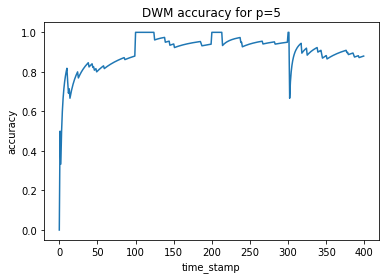

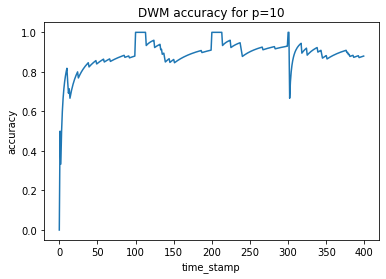

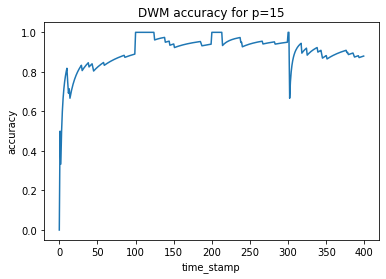

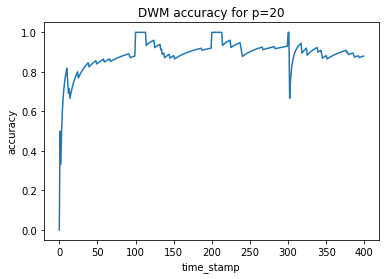

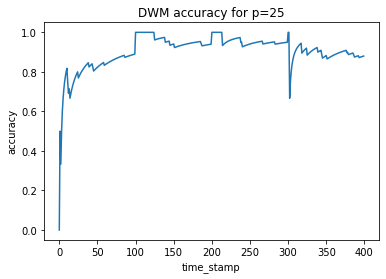

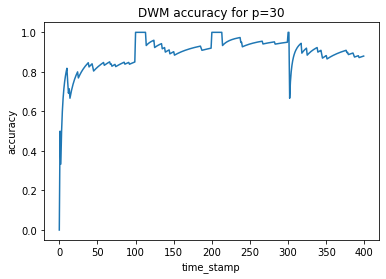

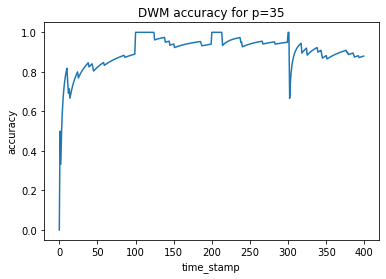

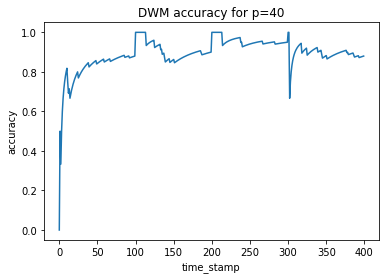

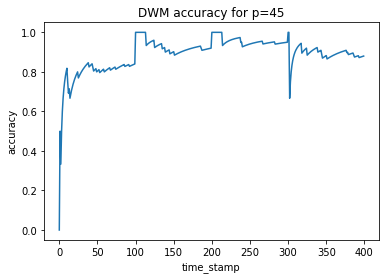

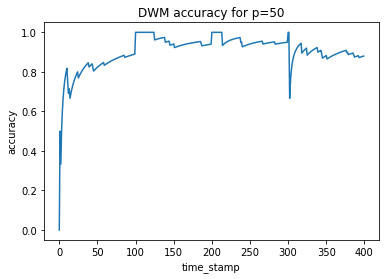

In [ ]:
for p in range(5,51,5):
  # Setup Dynamic Weighted Majority Ensemble Classifier
  dwm = DynamicWeightedMajorityClassifier(period=p)
  #initializing important variables
  n_samples=0
  max_samples=100
  time=0
  acc=[]
  correct_cnt=0
  # Setup a data stream
  stream = SEAGenerator(random_state=1,classification_function=0)
  # Function 0: if (attr1+attr2<=8) else 1
  # Train the classifier with the samples provided by the data stream
  while n_samples < max_samples and stream.has_more_samples():
      X, y = stream.next_sample()
      y_pred = dwm.predict(X)
      if y[0] == y_pred[0]:
          correct_cnt += 1
      dwm.partial_fit(X, y)
      n_samples += 1
      time +=1
      acc.append(correct_cnt/n_samples)
  #changing the classifier function (introducing drift)
  stream = SEAGenerator(random_state=1,classification_function=1)
  # Function 1: if (attr1+attr2<=9) else 1
  n_samples=0
  correct_cnt=0
  while n_samples < max_samples and stream.has_more_samples():
      X, y = stream.next_sample()
      y_pred = dwm.predict(X)
      if y[0] == y_pred[0]:
          correct_cnt += 1
      dwm.partial_fit(X, y)
      n_samples += 1
      time +=1
      acc.append(correct_cnt/n_samples)
  #changing the classifier function (introducing drift)
  stream = SEAGenerator(random_state=1,classification_function=2)
  # Function 2: if (attr1+attr2<=7) else 1
  n_samples=0
  correct_cnt=0
  while n_samples < max_samples and stream.has_more_samples():
      X, y = stream.next_sample()
      y_pred = dwm.predict(X)
      if y[0] == y_pred[0]:
          correct_cnt += 1
      dwm.partial_fit(X, y)
      n_samples += 1
      time +=1
      acc.append(correct_cnt/n_samples)
  stream = SEAGenerator(random_state=1,classification_function=3)
  # Function 3: if (attr1+attr2<=9.5) else 1
  n_samples=0
  correct_cnt=0
  while n_samples < max_samples and stream.has_more_samples():
      X, y = stream.next_sample()
      y_pred = dwm.predict(X)
      if y[0] == y_pred[0]:
          correct_cnt += 1
      dwm.partial_fit(X, y)
      n_samples += 1
      time +=1
      acc.append(correct_cnt/n_samples)
  # Plotting the accuracy after introducing drift
  plt.plot(range(time),acc)
  plt.xlabel('time_stamp')
  plt.ylabel('accuracy')
  plt.title(f"DWM accuracy for p={p}")
  plt.show()
